<a href="https://colab.research.google.com/github/Wissg/Machine-learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification



In [ ]:
from sklearn.datasets import make_blobs, make_circles
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
np.random.seed(100)

In [ ]:
X, y = make_blobs(n_samples=100,  centers=2, random_state=100, cluster_std=3)

In [ ]:
X, y = make_circles(100,  factor=.1, noise=.1,random_state=100)

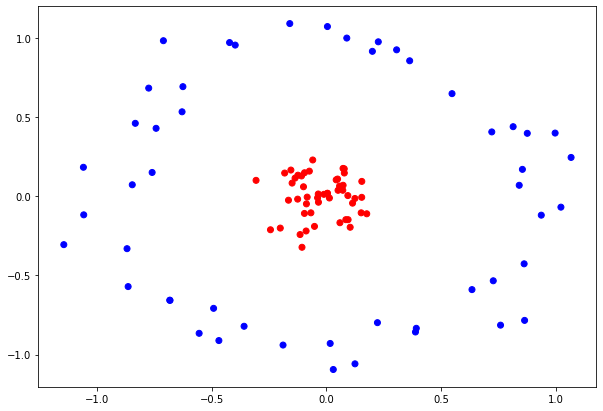

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1], c=y, cmap='bwr')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty='none')
log_reg.fit(X,y)
def plot_decision_function(model, ax=None, color='k'):
    """plot the function for two d"""
    if ax is None:
      ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    # create the grid
    x=np.linspace(xlim[0], xlim[1], 100)
    y=np.linspace(ylim[0], ylim[1], 100)
    Y,X=np.meshgrid(y,x)
    P=model.predict_proba(np.c_[X.ravel(),Y.ravel()])[:,1].reshape(X.shape)
    #plot boundary
    output=ax.contour(X,Y,P,colors=color,levels=[0.5])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return output


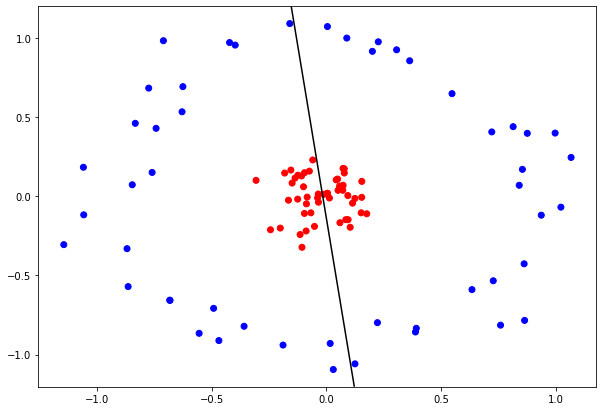

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plot_decision_function(log_reg,color='k')
plt.show()

#K_Nearest Neighbours


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

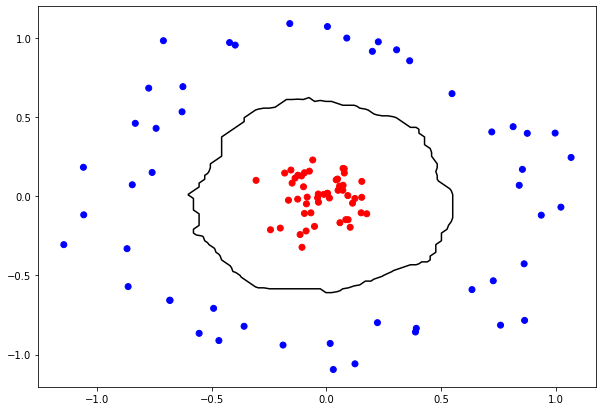

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plot_decision_function(knn,color='k')
plt.show()

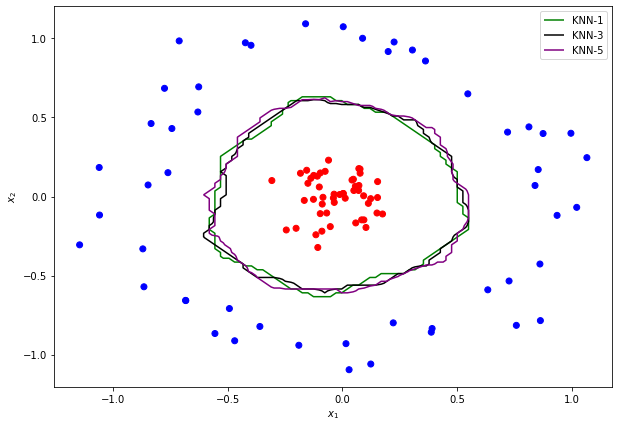

In [ ]:
plt.figure(figsize=[10,7])
ax=plt.gca()
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
h={}
para_list=[(1,'green'),(3,'black'),(5,'purple')]
for no_neighbor_i,color_i in para_list:
  knn=KNeighborsClassifier(n_neighbors=no_neighbor_i)
  knn.fit(X,y)
  fig_knn=plot_decision_function(knn,ax=ax,color=color_i)
  h[no_neighbor_i],_=fig_knn.legend_elements()
ax.legend([h[i][0] for i,j in para_list], ['KNN-{}'.format(i) for i,j in para_list])
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.show()

#Support Vector Machine


In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',probability=True,C=100)
svc.fit(X,y)

SVC(C=100, kernel='linear', probability=True)

<ipython-input-99-c965bc686824>:16: UserWarning: No contour levels were found within the data range.
  output=ax.contour(X,Y,P,colors=color,levels=[0.5])


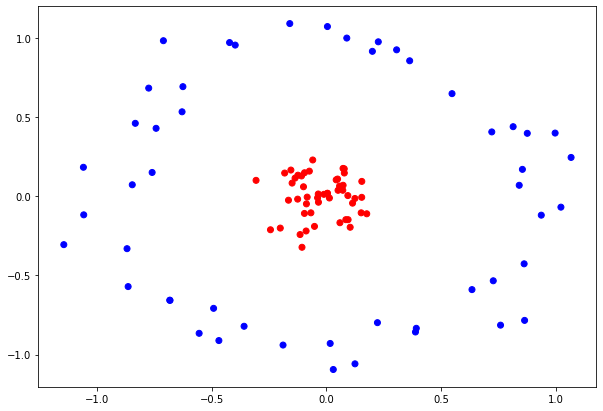

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plot_decision_function(svc,color='k')
plt.show()

##Function to plot SVM decision boundary

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True, color='k'):
    """plot the function for two d"""
    if ax is None:
      ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    # create the grid
    x=np.linspace(xlim[0], xlim[1], 100)
    y=np.linspace(ylim[0], ylim[1], 100)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #plot boundary
    output=ax.contour(X,Y,P,colors=color,levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    if plot_support:
      ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none',edgecolors='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return output


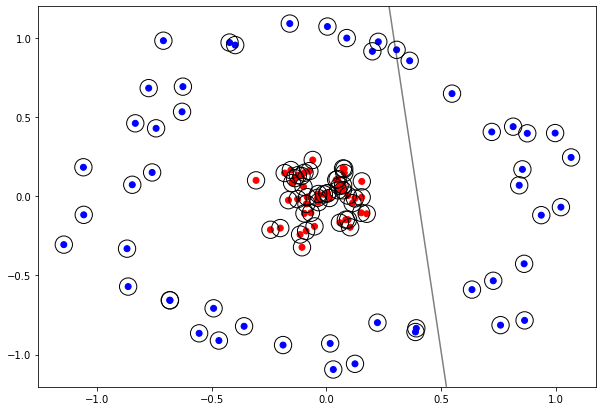

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plot_svc_decision_function(svc,color='k')
plt.show()

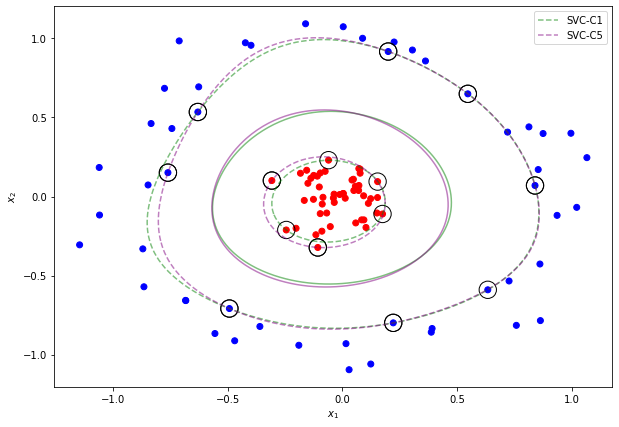

In [ ]:
plt.figure(figsize=[10,7])
ax=plt.gca()
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
h={}
para_list=[(1,'green'),(5,'purple')]
for C_i,color_i in para_list:
  svc=SVC(kernel='rbf',C=C_i)
  svc.fit(X,y)
  fig_svc=plot_svc_decision_function(svc,ax=ax,color=color_i)
  h[C_i],_=fig_svc.legend_elements()
ax.legend([h[i][0] for i,j in para_list], ['SVC-C{}'.format(i) for i,j in para_list])
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.show()

#Decision Tree

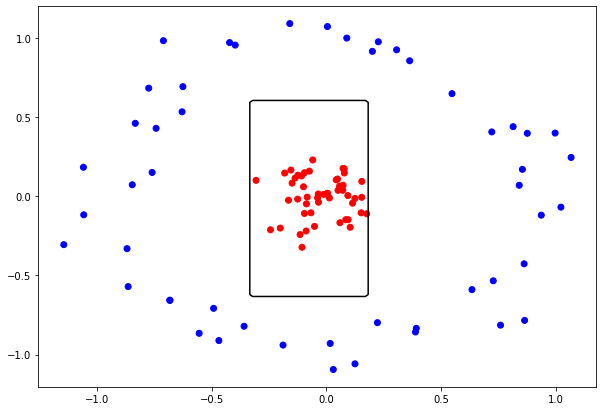

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(X,y)
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plot_decision_function(tree,color='k')
plt.show()

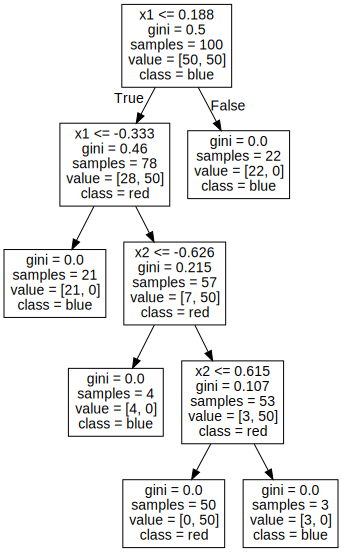

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
Source(export_graphviz(tree, out_file=None,feature_names=['x1','x2'], class_names=['blue','red']))


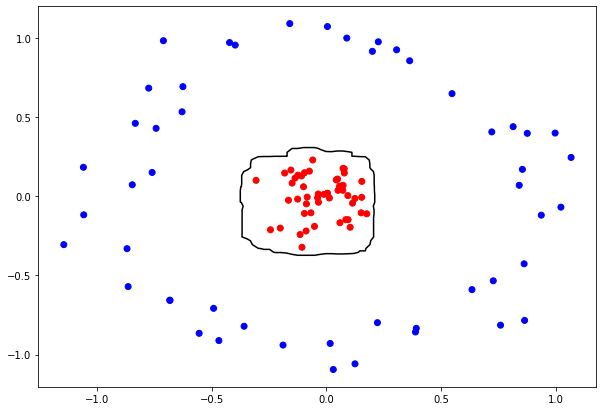

In [ ]:
rf=RandomForestClassifier(max_depth=4)
rf.fit(X,y)
plt.figure(figsize=[10,7])
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plot_decision_function(rf,color='k')
plt.show()
